#Homework 2 - Plotting
<i>Samuel Barton</i>

In this assignment we plot various columns of our sample dataset against each other and play around with the interesting things that Python and numpy allow one to do with plotting and analyzing data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

Now I will define three different fitting functions:

In [78]:
def linearFit(t, m, b): 
    return m*t + b

def expDecay(t, a, b, c):
    return a*np.exp(-b*t) + c

def gaussianWithOffset(t, a, c, s):
    return a*np.exp(-((t-c)**2)/(2*s**2))

def leastSquares(t,a,b,c):
    return a*t**2 + b*t + c

def cosDif(t,a,b,c):
    return a*np.cos(b*(t-c))

Now I read in the needed data file; the "skiprows" parameter allows
me to ignore the header line which labels the columns.

In [3]:
data = np.genfromtxt('002Data.txt', skiprows=1)

This command extracts the first column of data;
python indexes starting at zero, so be careful!

In [4]:
data[ : ,0]  

array([ 0.015,  0.172,  0.329,  0.486,  0.643,  0.8  ,  0.958,  1.115,
        1.272,  1.429,  1.586,  1.743,  1.9  ,  2.057,  2.214,  2.317,
        2.528,  2.685,  2.843,  3.   ])

In [5]:
x = data[ : ,0]
z = data[ : ,1]

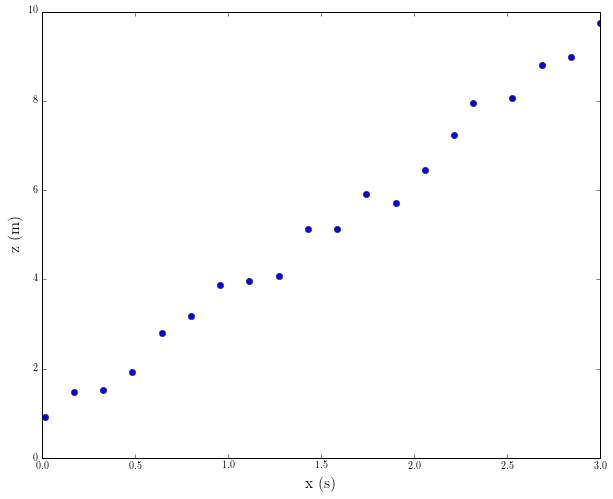

In [9]:
plt.plot(x,z, 'o')
plt.ylabel(r'z (m)', fontsize = 16)
plt.xlabel(r'x (s)', fontsize = 16)
plt.show()

In [7]:
fitParams, fitCovariances = curve_fit(linearFit, x, z)
print(fitParams)
print(fitCovariances)

[ 2.92592864  0.73869777]
[[ 0.00440717 -0.00663102]
 [-0.00663102  0.01357327]]


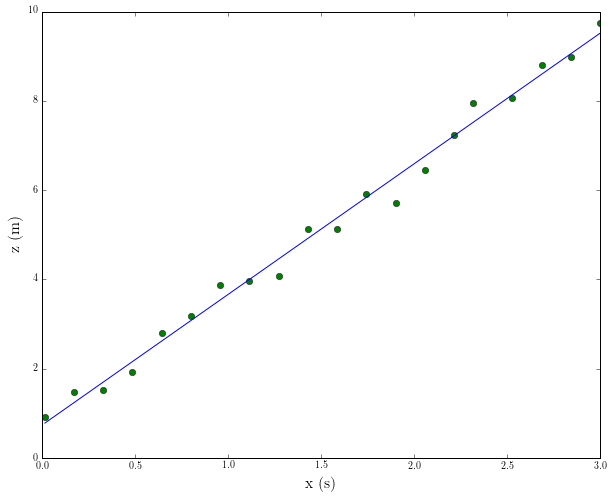

In [13]:
plt.ylabel(r'z (m)', fontsize = 16)
plt.xlabel(r'x (s)', fontsize = 16)
plt.plot(x,z, 'go')
plt.plot(x, linearFit(x, fitParams[0], fitParams[1]))
plt.show()

Below are four plots of the different combinations of plain, semi-log, and log-log plots of $u$-vs-$x$ and $v$-vs-$x$.

In [15]:
u = data[ :, 2]

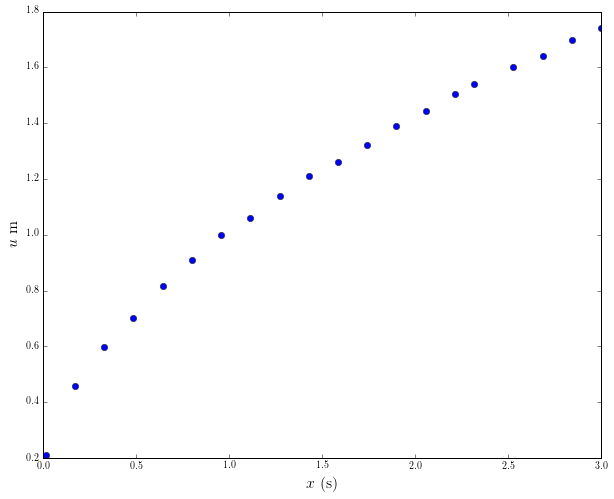

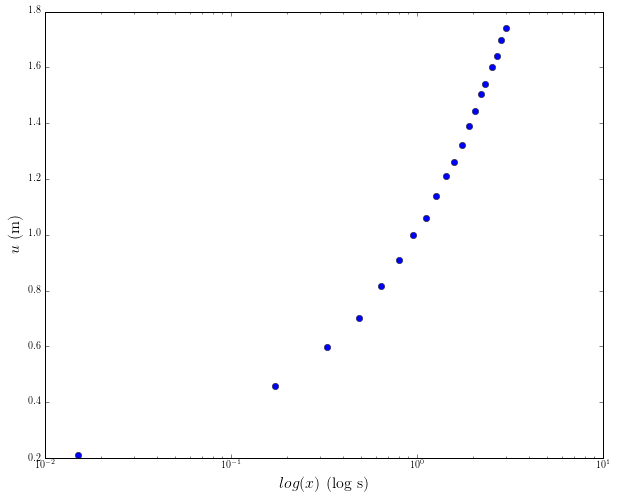

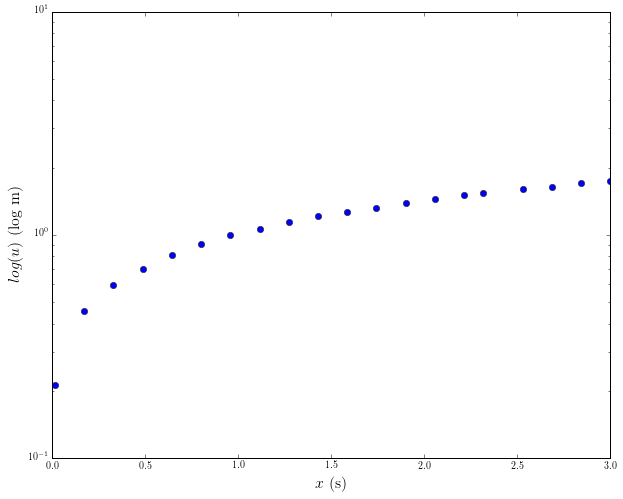

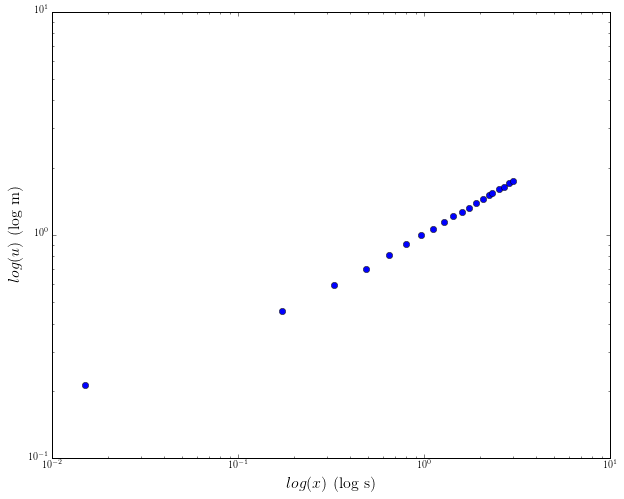

In [54]:
plt.plot(x,u, 'o')
plt.ylabel(r'$u$ {m}', fontsize = 16)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.show()
plt.plot(x,u, 'o')
plt.ylabel(r'$u$ (m)', fontsize = 16)
plt.xlabel(r'$log(x)$ (log s)', fontsize = 16)
plt.xscale('log')
plt.show()
plt.plot(x,u, 'o')
plt.ylabel(r'$log(u)$ (log m)', fontsize = 16)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.yscale('log')
plt.show()
plt.plot(x,u, 'o')
plt.ylabel(r'$log(u)$ (log m)', fontsize = 16)
plt.xlabel(r'$log(x)$ (log s)', fontsize = 16)
plt.xscale('log')
plt.yscale('log')
plt.show()

The only one of these plots which is even close to linear is the log log plot, which implies that the function graphed here is of the form $u = ax^n$ where $n < 1$ and $a \ne 0$. Now to repeat with $v$ and $x$.

In [45]:
v = data[ :,3]

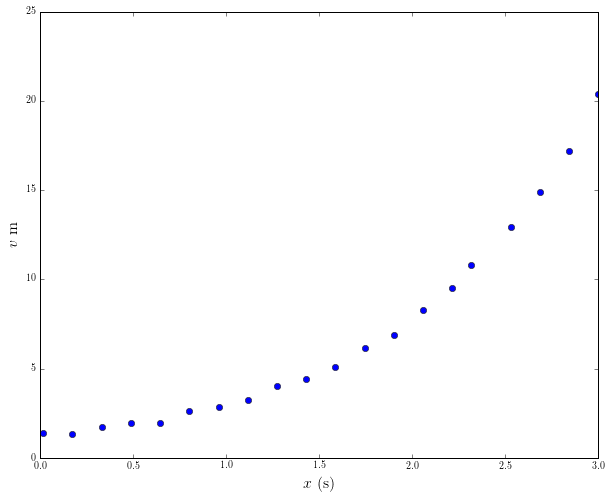

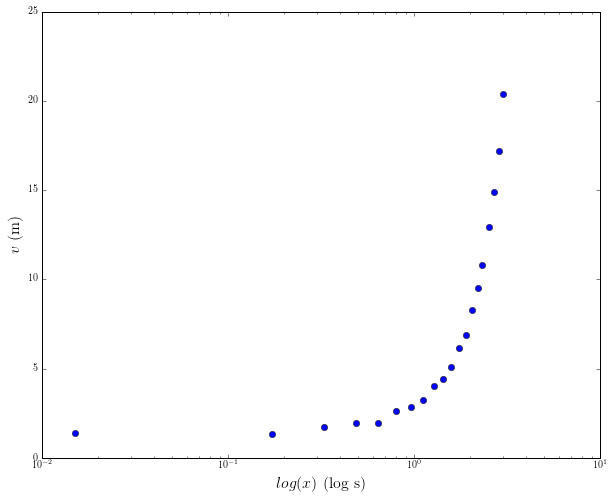

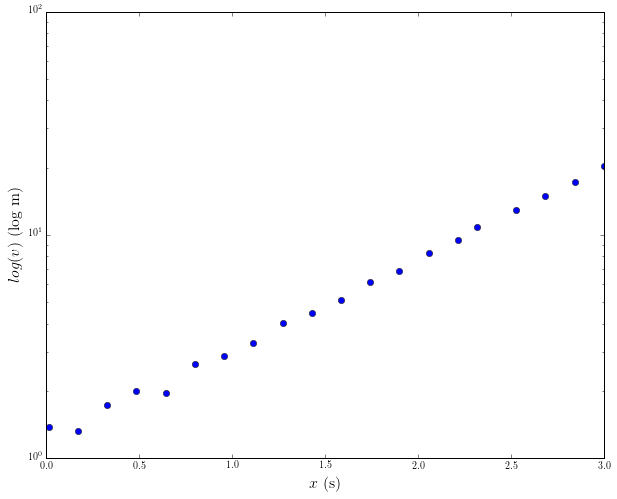

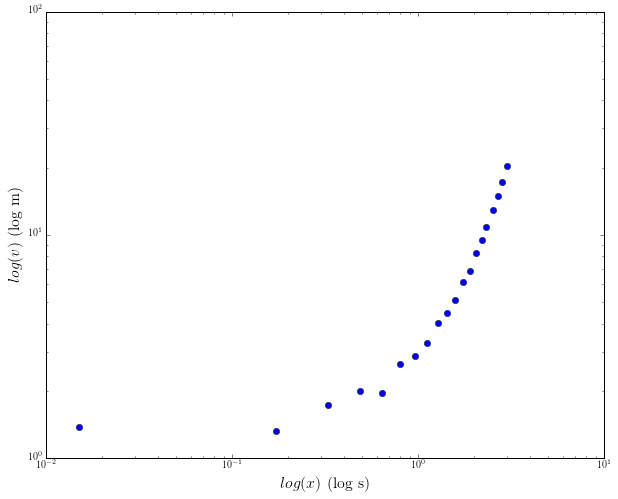

In [53]:
plt.plot(x,v, 'o')
plt.ylabel(r'$v$ {m}', fontsize = 16)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.show()
plt.plot(x,v, 'o')
plt.ylabel(r'$v$ (m)', fontsize = 16)
plt.xlabel(r'$log(x)$ (log s)', fontsize = 16)
plt.xscale('log')
plt.show()
plt.plot(x,v, 'o')
plt.ylabel(r'$log(v)$ (log m)', fontsize = 16)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.yscale('log')
plt.show()
plt.plot(x,v, 'o')
plt.ylabel(r'$log(v)$ (log m)', fontsize = 16)
plt.xlabel(r'$log(x)$ (log s)', fontsize = 16)
plt.xscale('log')
plt.yscale('log')
plt.show()

In the vase of $v$-vs-$x$, the straight line one is the semi log plot of $log (v)$-vs-$x$. this means that $y = ax^n$ where $n > 1$ and $a \ne 0$. 

Now to plot $y$-vs-$x$ using $e$ for our uncertianties.

In [47]:
y = data[ :,4]
e = data[ :,5]

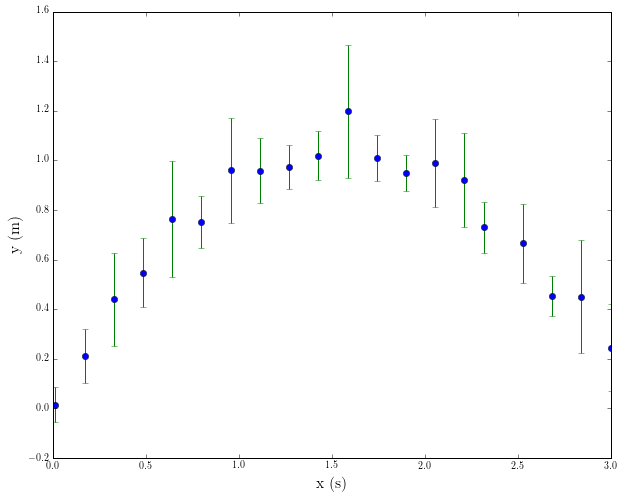

In [52]:
plt.plot(x,y, 'o')
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.ylabel(r'$y$ (m)', fontsize = 16)
plt.errorbar(x,y, yerr=e, linestyle='none')
plt.show()

Now that we have done this graph with error bars, we are asked to fit it with a least squares fitting method. Namely trying to explain the points in the form $y = ax^2 + bx + c$.

In [65]:
fitParams, fitCovariances = curve_fit(leastSquares, x,y)
print(fitParams)
print(fitCovariances)

[-0.41725866  1.3126319   0.02259448]
[[ 0.0003711  -0.00111712  0.00053789]
 [-0.00111712  0.00360652 -0.00198586]
 [ 0.00053789 -0.00198586  0.00153018]]


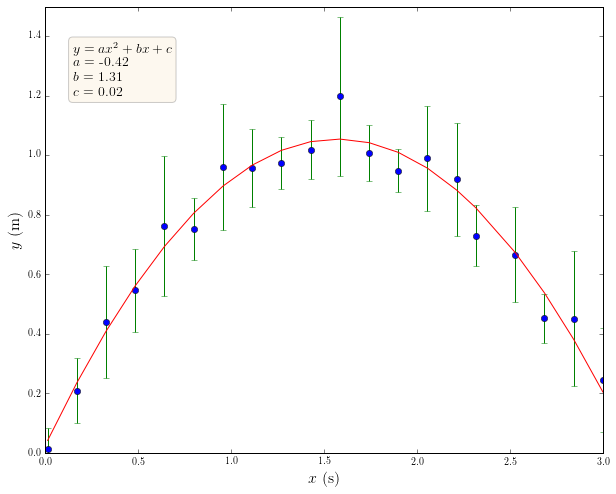

In [70]:
plt.plot(x,y,'o')
plt.ylim(0,1.5)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.ylabel(r'$y$ (m)', fontsize = 16)
plt.errorbar(x,y, yerr=e, linestyle='none')
plt.plot(x, leastSquares(x, fitParams[0], fitParams[1], fitParams[2]))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(0.15, 1.2, 
    ("$y = a x^2 + bx + c$\n $a =$ %.2f\n $b =$ %.2f\n $c =$ %.2f" 
    % (fitParams[0], fitParams[1], fitParams[2])), fontsize=14,bbox=props )
plt.show()

Now, fit the gaussian function $y = a e^{\frac{(x-c)^2}{2\sigma^2}}$, and the function y =  to the y-vs-x data set

In [71]:
fitParams, fitCovariances = curve_fit(gaussianWithOffset, x,y)
print(fitParams)
print(fitCovariances)

[ 1.10721112  1.57239239  0.87295933]
[[  1.31089084e-03  -3.30561329e-05  -8.56876102e-04]
 [ -3.30561329e-05   1.11606236e-03   6.74304857e-05]
 [ -8.56876102e-04   6.74304857e-05   1.48324147e-03]]


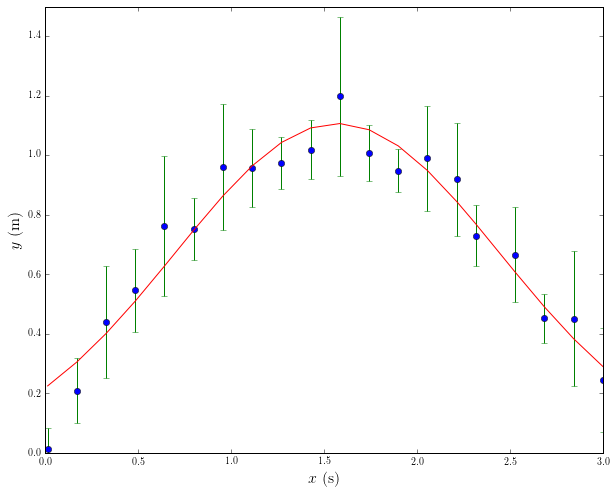

In [72]:
plt.plot(x,y,'o')
plt.ylim(0,1.5)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.ylabel(r'$y$ (m)', fontsize = 16)
plt.errorbar(x,y, yerr=e, linestyle='none')
plt.plot(x, gaussianWithOffset(x, fitParams[0], fitParams[1], fitParams[2]))
plt.show()

In [79]:
fitParams, fitCovariances = curve_fit(cosDif, x,y)
print(fitParams)
print(fitCovariances)

[ 1.07194362  0.95660201  1.57422704]
[[  5.11383114e-04   2.03370907e-04  -2.80417276e-05]
 [  2.03370907e-04   3.72330120e-04  -5.60074306e-05]
 [ -2.80417276e-05  -5.60074306e-05   4.29356323e-04]]


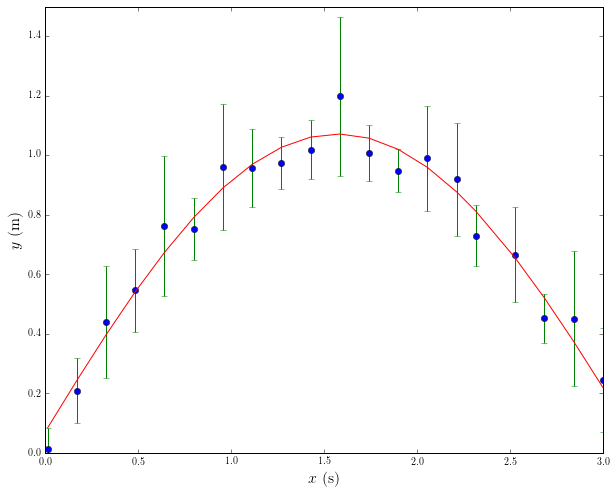

In [80]:
plt.plot(x,y,'o')
plt.ylim(0,1.5)
plt.xlabel(r'$x$ (s)', fontsize = 16)
plt.ylabel(r'$y$ (m)', fontsize = 16)
plt.errorbar(x,y, yerr=e, linestyle='none')
plt.plot(x, cosDif(x, fitParams[0], fitParams[1], fitParams[2]))
plt.show()

<h4>Conclusion</h4>

Of the three fits, visual inspections shows that the first one, while reasonable, is not as good as the second or third. The gaussian function fits portions of the data quite well, but it divierges near the extremeities and thus is infirior to the cosine-type funciton which stays with the data from end to end with only one major outlier (at the very peak). 